In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
#jackknife analysis
# data[rebin] = [value, error, chisqr]
pidata = {
    1:[0.06608,0.00019,2.51],
    2:[0.06609,0.00022,2.14],
    4:[0.06603,0.00027,1.82],
    8:[0.06607,0.00030,1.72],
    10:[0.06609,0.00032,1.75],
    16:[0.06611,0.00034,1.85],
    20:[0.06608,0.00033,1.96],
    25:[0.06614,0.00032,1.78]
}
Ndata = {
    1:[0.3149,0.0035],
    2:[0.3151,0.0034],
    4:[0.3152,0.0033],
    8:[0.3148,0.0033],
    10:[0.3145,0.0034],
    16:[0.3137,0.0036],
    20:[0.3149,0.0031],
    25:[0.3144,0.0031],
}
#bootstrap analysis Nb=500
pidata_b500 = {
    1:[0.06607,0.00023,2.49],
    5:[0.06595,0.00029,1.77],
    10:[0.06613,0.00038,1.72],
    16:[0.06608,0.00036,1.85],
    20:[0.06608,0.00042,2.10],
    25:[0.06610,0.00036,1.81]
}
Ndata_b500 = {
    1:[0.3155,0.0036],
    5:[0.3155,0.0037],
    10:[0.3141,0.0036],
    16:[0.3135,0.0036],
    20:[0.3152,0.0030],
    25:[0.3156,0.0030],
}
#bootstrap analysis Nb=Nbin
pidata_bN = {
    1:[0.06605,0.00020,2.46],
    5:[0.06598,0.00029,1.75],
    10:[0.06625,0.00038,1.88],
    16:[0.06600,0.00029,2.33],
    20:[0.06636,0.00028,2.09],
    25:[0.06622,0.00038,1.76]
}
Ndata_bN = {
    1:[0.3153,0.0036],
    5:[0.3155,0.0037],
    10:[0.3136,0.0033],
    16:[0.3151,0.0029],
    20:[0.3162,0.0031],
    25:[0.3122,0.0040],
}
all_pi_data = {
    "jackknife":pidata,
    r"bootstrap $N_B=500$":pidata_b500,
#     r"bootstrap $N_B=N_{\textup{bin}}$":pidata_bN
}
all_N_data = {
    "jackknife":Ndata,
    r"bootstrap $N_B=500$":Ndata_b500,
#     r"bootstrap $N_B=N_{\textup{bin}}$":Ndata_bN
}

In [3]:
N_rebin = {}
N_vals = {}
pi_rebin = {}
pi_vals = {}
for key in all_N_data.keys():
    N_rebin[key] = np.array(list(all_N_data[key].keys()))
    N_vals[key] = np.transpose(np.array(list(all_N_data[key].values())))
for key in all_pi_data.keys():
    pi_rebin[key] = np.array(list(all_pi_data[key].keys()))
    pi_vals[key] = np.transpose(np.array(list(all_pi_data[key].values())))

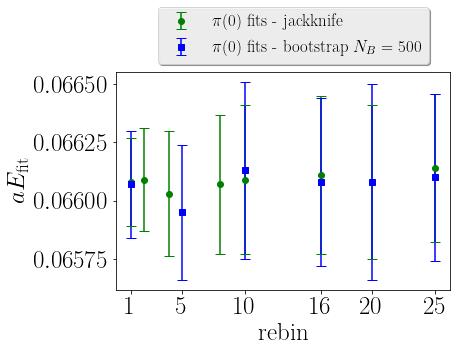

In [4]:
i=0
for dataset in pi_rebin.keys():
    plt.errorbar(x=pi_rebin[dataset],y=pi_vals[dataset][0],yerr=pi_vals[dataset][1],label=r'$\pi$(0) fits - '+dataset, linewidth=0.0, capsize=5, elinewidth=1.5,color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin")
plt.ylabel(r"$aE_{\textup{fit}}$")
plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
plt.legend(bbox_to_anchor = (0.1, 1.0))

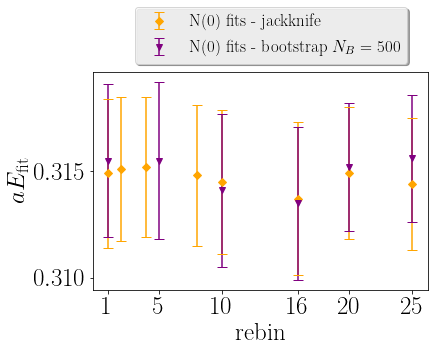

In [5]:
for dataset in N_rebin.keys():
    plt.errorbar(x=N_rebin[dataset],y=N_vals[dataset][0],yerr=N_vals[dataset][1],label=r'N(0) fits - '+dataset, linewidth=0.0, capsize=5, elinewidth=1.5,color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin")
plt.ylabel(r"$aE_{\textup{fit}}$")
plt.xticks(ticks=N_rebin[r"bootstrap $N_B=500$"])
plt.legend(bbox_to_anchor = (0.1, 1.0))

In [6]:
N_rel_err = {}
pi_rel_err = {}
for key in all_N_data.keys():
    N_rel_err[key] = N_vals[key][1]/N_vals[key][0]
for key in all_pi_data.keys():
    pi_rel_err[key] = pi_vals[key][1]/pi_vals[key][0]

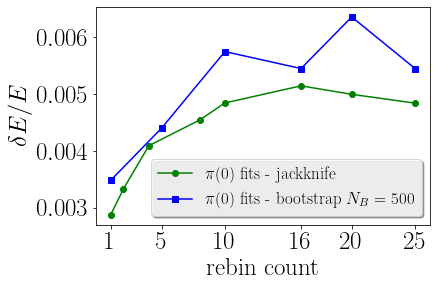

In [20]:
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_rel_err[dataset],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\delta E/E$")
plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
plt.legend()
plt.savefig("rebin_analysis_pi-rel-err.pdf")

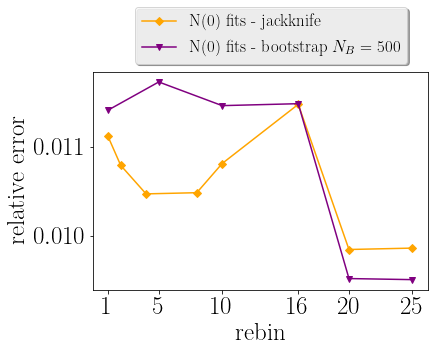

In [8]:
for dataset in N_rebin.keys():
    plt.plot(N_rebin[dataset],N_rel_err[dataset],label=r'N(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin")
plt.ylabel(r"relative error")
plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
plt.legend(bbox_to_anchor = (0.1, 1.0))

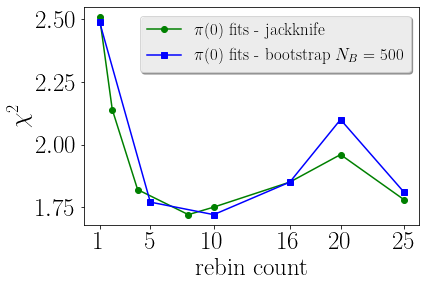

In [18]:
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_vals[dataset][2],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\chi^2$")
plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
plt.legend()
plt.savefig("rebin_analysis_pi-chi.pdf")

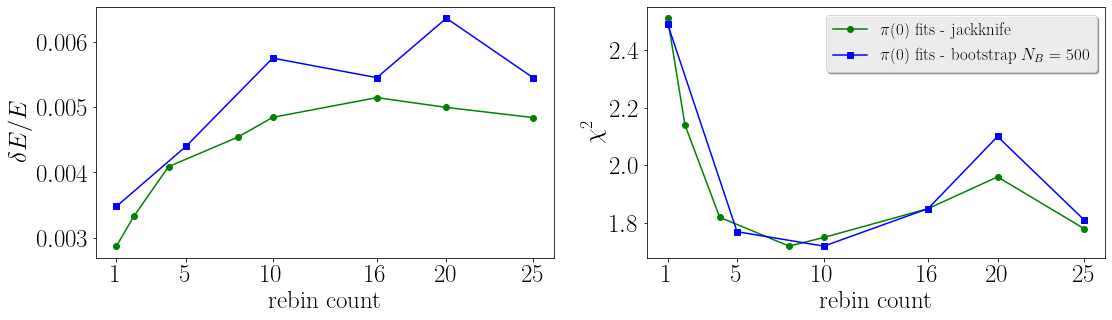

In [29]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(5)
plt.subplot(1, 2, 1)
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_rel_err[dataset],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\delta E/E$")
plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
# plt.legend()
plt.subplot(1, 2, 2)
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_vals[dataset][2],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\chi^2$")
plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
plt.tight_layout()
plt.legend()
plt.savefig("rebin_analysis.pdf")